# Association Rule Learning (Apriori Analysis) for Marine seismic Interpretation

* The Apriori algorithm even called Basket Analysis is generally applied for selling more items in supermarkets.

* However; if you want, you can use this algorithm for different topics in which you want to study on frequency. 

* The Question to be Answered is "which item combinations are frequently seem together".

* In this study, I figure out two ways of application of apriori algorithm. 

    - Firstly, I used manual functions created by me, 
    - Secondly, I used the apriori function from the mlxted library. 
    
* Using the mlxtend.apriori function is much easier and gives more detailed results. But the two applications offer the same results.


**Three Main Metrics**

* **Support**: 
    - Support(X,Y) = Freq(X,Y) / N
    
    - Probability of X and y occurring together = Freq of X and Y occurring together / Numb of All Transactions
    
    - If support value is high, it means that these pair of items are bought together much more
    
    - The number of transactions in which a specific product (or combination of products) occurs
    
    - if one item are observed below the threshold value, it means that is not useful for the user
    
* **Confidence**
    - Confidence(X,Y) = Freq(X,Y) / Freq(X)
    
    - Probability of buying Y when X is bought = Freq of X and Y occurring together/ Freq of X
    
    - example 25% means that the association occurs 25% percentage of the case

* **Lift**
    - Lift = Support(X,Y) / (Support(X)*Support(Y))
    - When X is purchased, the probability of Y being bought increases by the lift value
    - performance metric 
    - lift of a rule is performance metric that indicates the strength of the association between the products in the rule[1]

    - If the lift of a rule is higher than 1, the lift value tells you how strongly the righthand side product depends on the left-hand side[1].

# 1 - Apriori Application by Manual

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations, chain
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("seismic_apriori_analysis.csv", index_col=[0])

In [3]:
df.head(2)

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"('mud volcano', 'gas flow', 'gas plume', 'gas acummulation')",0,1,0,0,0,1,1,0,0,1,0,0,0,0
"('gassy sediment', 'mud volcano', 'gas plume', 'anticline')",1,1,0,0,0,0,1,0,0,0,1,0,0,0


----------

## Step 1. Computing the support for each individual item

* Support value is the number of unique items in the all interpretations 
* It is calculated by summing the row values of all variables in the data set separately.
* Applied the Support threshold to find out which products are observed more
* Add Confidence and Lift constant values to concat dataframe at the end without problem

----------

### Graph of Items Count in Dataset

In [4]:
# frequency of the unique items
df.sum()

gassy sediment         27
mud volcano            27
mud diapir             25
feeder channel         26
fault                  26
gas flow               31
gas plume              21
pockmark               31
carbonate structure    19
gas acummulation       20
anticline              21
monocline              20
channel                21
erosional surface      26
dtype: int64

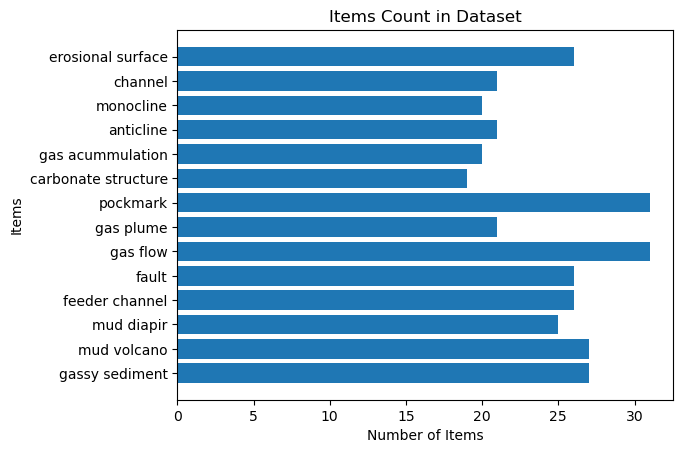

In [5]:
plt.barh(df.columns, df.sum())

plt.title("Items Count in Dataset")

plt.xlabel("Number of Items")

plt.ylabel("Items")           

plt.show();

------------

### Support Value Graph

In [5]:
# support value

round(df.sum() / df.shape[0],3)

gassy sediment         0.293
mud volcano            0.293
mud diapir             0.272
feeder channel         0.283
fault                  0.283
gas flow               0.337
gas plume              0.228
pockmark               0.337
carbonate structure    0.207
gas acummulation       0.217
anticline              0.228
monocline              0.217
channel                0.228
erosional surface      0.283
dtype: float64

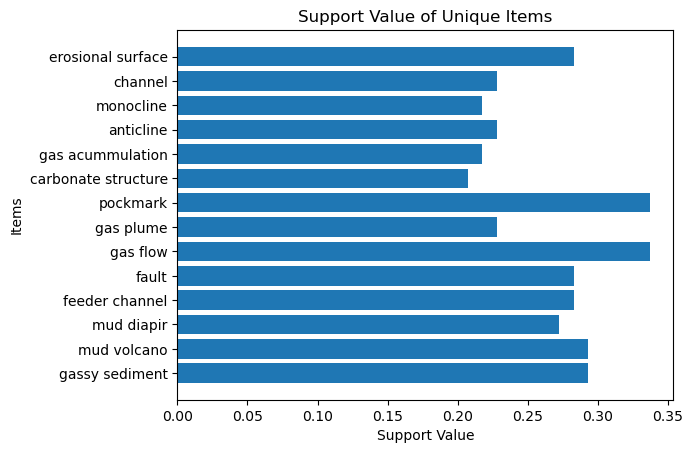

In [6]:
plt.barh(df.columns, round(df.sum() / df.shape[0],3))

plt.title("Support Value of Unique Items")

plt.xlabel("Support Value")

plt.ylabel("Items")           

plt.show();

----------

### Function for unique item

In [6]:
def one_apriori(dataframe, Support=False, support_value = 0.01):
    
    """
    Parameters:
        dataframe : initial dataframe for the apriori analysis. 
        Support: If True apply Support Threshold to eliminate below products. Default value is False
        support_value: support threshold value. Default value  = 0.2
        
    Info:
        This function calculate freq and support values of the each individual item in the transactions.
        
    Return:
        df_new : Dataframe
    """
    
    # frequency   
    freq = dataframe.sum()
        
    #support value
    support_values = freq.agg(lambda x: round(x / dataframe.shape[0], 3))
        
    #dataframe
    df_new = pd.DataFrame(support_values, columns = ["Support"])

    df_new = df_new.sort_values("Support", ascending = False)

    df_new["Freq"] = freq

    # Constant Confidence anf lift values 

    df_new["Confidence"] = 1

    df_new["Lift"] = np.NaN
        
    # Apply Support Threshold

    if Support:

        df_new = df_new.loc[(df_new["Support"] >= support_value)]

    return df_new
        

In [7]:
df_one = one_apriori(dataframe = df)
df_one

,Support,Freq,Confidence,Lift
gas flow,0.337,31,1,NaN
pockmark,0.337,31,1,NaN
gassy sediment,0.293,27,1,NaN
mud volcano,0.293,27,1,NaN
feeder channel,0.283,26,1,NaN
fault,0.283,26,1,NaN
erosional surface,0.283,26,1,NaN
mud diapir,0.272,25,1,NaN
gas plume,0.228,21,1,NaN
anticline,0.228,21,1,NaN


------------------

## Step 2. Computation the support value for item pairs

* The support value is the number of coexistence of product pairs in each interpretaion.
* Add Confidence and Lift constant values are calculated

In [8]:
# combinations of two items

comb_number = 2

two_list= [list(i) for i in combinations(df_one.index, comb_number)]

two_list[0:10]

[['gas flow', 'pockmark'],
 ['gas flow', 'gassy sediment'],
 ['gas flow', 'mud volcano'],
 ['gas flow', 'feeder channel'],
 ['gas flow', 'fault'],
 ['gas flow', 'erosional surface'],
 ['gas flow', 'mud diapir'],
 ['gas flow', 'gas plume'],
 ['gas flow', 'anticline'],
 ['gas flow', 'channel']]

In [9]:
# example for ('mud diapir', 'gas plume')

df[['mud diapir', 'gas plume']]

,mud diapir,gas plume
products,,
"('mud volcano', 'gas flow', 'gas plume', 'gas acummulation')",0,1
"('gassy sediment', 'mud volcano', 'gas plume', 'anticline')",0,1
"('feeder channel', 'gas flow', 'gas acummulation', 'erosional surface')",0,0
"('mud diapir', 'gas plume', 'pockmark', 'gas acummulation')",1,1
"('mud volcano', 'fault', 'erosional surface')",0,0
...,...,...
"('mud diapir', 'fault', 'gas flow', 'channel')",1,0
"('mud volcano', 'feeder channel', 'fault', 'carbonate structure')",0,0
"('gassy sediment', 'feeder channel', 'pockmark', 'carbonate structure')",0,0


In [10]:
# if 'mud diapir'and 'gas plume' exist in index, sum of items should be 2 

df[df[['mud diapir', 'gas plume']].sum(axis=1) == 2]

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"('mud diapir', 'gas plume', 'pockmark', 'gas acummulation')",0,0,1,0,0,0,1,1,0,1,0,0,0,0
"('mud diapir', 'feeder channel', 'gas flow', 'gas plume')",0,0,1,1,0,1,1,0,0,0,0,0,0,0
"('mud volcano', 'mud diapir', 'feeder channel', 'gas plume')",0,1,1,1,0,0,1,0,0,0,0,0,0,0
"('mud diapir', 'gas plume', 'pockmark', 'carbonate structure')",0,0,1,0,0,0,1,1,1,0,0,0,0,0


In [11]:
# support value and frequency

values_ = []

freq = []

for i in range(len(two_list)):
    
    items = df[df[two_list[i]].sum(axis=1) == len(two_list[i])]

    item_support = len(items) / df.shape[0]

    values_.append(item_support)

    freq.append(len(items))


In [12]:
# create dataframe

df_test = pd.DataFrame(values_, columns=["Support"])

df_test["products"] = two_list

df_test["Freq"] = freq

df_test = df_test.set_index("products")

df_test =df_test.sort_values(by = "Support", ascending=False)

In [13]:
df_test.head()

,Support,Freq
products,,
"[pockmark, feeder channel]",0.108696,10
"[gas flow, mud volcano]",0.108696,10
"[gassy sediment, erosional surface]",0.097826,9
"[gassy sediment, mud volcano]",0.097826,9
"[mud volcano, fault]",0.097826,9


In [14]:
list_conf = []

for i in range(len(df_test)):
    
    conf = df_test.Freq[i] / df_one.loc[[df_test.index[i][0]]]["Freq"]
    
    list_conf.append(np.round(conf[0],2))
    
df_test["confidence"] = list_conf

In [15]:
# calculate Lift

list_lift = []

for i in range(len(df_test)):
    
    lift = df_test.Support[i] / (df_one.loc[[df_test.index[i][0]]].Support[0] * df_one.loc[[df_test.index[i][1]]].Support[0])
    
    list_lift.append(np.round(lift,2))
    
    
df_test["lift"] = list_lift

---------

In [16]:
# support value bigger than 0.06

df_test = df_test.loc[df_test["Support"] >= 0.06 ]

df_test.head()

,Support,Freq,confidence,lift
products,,,,
"[pockmark, feeder channel]",0.108696,10,0.32,1.14
"[gas flow, mud volcano]",0.108696,10,0.32,1.10
"[gassy sediment, erosional surface]",0.097826,9,0.33,1.18
"[gassy sediment, mud volcano]",0.097826,9,0.33,1.14
"[mud volcano, fault]",0.097826,9,0.33,1.18


### Function for two items

In [17]:
def two_apriori(dataframe , dataframe_1 , Support = False, support_value = 0.01 ):
    
    """
    Parameters:
        dataframe : initial dataframe for the apriori analysis
        dataframe_1 : first step output dataframe which contains individual products
        Support: If "True", apply Support Threshold to eliminate products under this value. Default boolean value is False
        support_value: support threshold value. Default value  = 0.2
        
    Info:
        This function calculates the frequency and support values of coexistence product pairs in each transaction.
        
    Return:
        df_new : Dataframe
    """
    
    # combination of two items
    item_list= [list(i) for i in combinations(dataframe_1.index, 2)]
    

    # FIND ITEMS MATCHED WITH COMBINATION
    values_ = []
    freq = []

    for i in range(len(item_list)):
        
    # try:  if the combination has not any items with given support value, dont break
        try:

            items = dataframe[dataframe[item_list[i]].sum(axis=1) == len(item_list[i])]

            item_support = round(len(items) / dataframe.shape[0],3)

            values_.append(item_support)

            freq.append(len(items))

        except (KeyError) as Error :

            print("No items:",Error) 
            
            
    # DATAFRAME with FREQ and SUPPORT VARIABLES
    
    # support value
    df_new = pd.DataFrame(values_, columns=["Support"])
    
    # item frequency
    df_new["Freq"] = freq
    
    # to set index add items to dataframe
    df_new["products"] = item_list

    df_new = df_new.set_index("products")
    
    # sort
    df_new = df_new.sort_values(by = "Support", ascending=False)


    # CONFIDENCE
    list_conf = []
    # iterate in each index in df_new
    for i in range(len(df_new)):


        conf = df_new.Freq[i] / dataframe_1.loc[[df_new.index[i][0]]]["Freq"]

        list_conf.append(np.round(conf[0],2))
        
    df_new["Confidence"] = list_conf
    

    # LIFT
    list_lift = []
    for i in range(len(df_new)):

        lift = df_new.Support[i] / (dataframe_1.loc[[df_new.index[i][0]]].Support[0] * dataframe_1.loc[[df_new.index[i][1]]].Support[0])

        list_lift.append(np.round(lift,3))


    df_new["Lift"] = list_lift
    
    
    # SUPPORT THRESHOLD 
    
    if Support:
    
        df_new = df_new.loc[df_new["Support"] >= support_value ]
    
    return df_new

In [18]:
df_two = two_apriori(dataframe = df, 
                     dataframe_1 = df_one, 
                     Support = True)

In [19]:
df_two.head()

,Support,Freq,Confidence,Lift
products,,,,
"[pockmark, feeder channel]",0.109,10,0.32,1.143
"[gas flow, mud volcano]",0.109,10,0.32,1.104
"[gassy sediment, erosional surface]",0.098,9,0.33,1.182
"[gassy sediment, mud volcano]",0.098,9,0.33,1.142
"[mud volcano, fault]",0.098,9,0.33,1.182


----------

--------

## Step 3. Computation the support value for item combinations (more than two)

* The support value is the number of coexistence of product combinations in each interpretaion.

* Add Confidence and Lift constant values are calculated

In [20]:
# combination of the pair items

comb_number = 2

three_list = [i for i in combinations(df_two.index, 2)]

three_list[0:10]

[(['pockmark', 'feeder channel'], ['gas flow', 'mud volcano']),
 (['pockmark', 'feeder channel'], ['gassy sediment', 'erosional surface']),
 (['pockmark', 'feeder channel'], ['gassy sediment', 'mud volcano']),
 (['pockmark', 'feeder channel'], ['mud volcano', 'fault']),
 (['pockmark', 'feeder channel'], ['pockmark', 'mud diapir']),
 (['pockmark', 'feeder channel'], ['pockmark', 'erosional surface']),
 (['pockmark', 'feeder channel'], ['gas flow', 'fault']),
 (['pockmark', 'feeder channel'], ['gas flow', 'mud diapir']),
 (['pockmark', 'feeder channel'], ['gassy sediment', 'fault']),
 (['pockmark', 'feeder channel'], ['fault', 'anticline'])]

In [21]:
# to get unique combinations of the items

three_list_set = []

for i in range(len(three_list)):
    
    chain_ = set(chain.from_iterable(three_list[i]))
    
    if chain_ not in three_list_set:
        
        three_list_set.append(chain_)


In [22]:
# set to list

set_to_list = [list(three_list_set[i]) for i in range(len(three_list_set))]

In [23]:
set_to_list[0:10]

[['pockmark', 'feeder channel', 'mud volcano', 'gas flow'],
 ['erosional surface', 'pockmark', 'feeder channel', 'gassy sediment'],
 ['pockmark', 'feeder channel', 'mud volcano', 'gassy sediment'],
 ['pockmark', 'fault', 'feeder channel', 'mud volcano'],
 ['pockmark', 'feeder channel', 'mud diapir'],
 ['erosional surface', 'pockmark', 'feeder channel'],
 ['pockmark', 'feeder channel', 'fault', 'gas flow'],
 ['pockmark', 'feeder channel', 'mud diapir', 'gas flow'],
 ['pockmark', 'feeder channel', 'fault', 'gassy sediment'],
 ['anticline', 'pockmark', 'feeder channel', 'fault']]

In [24]:
# support values

values_ = []

freq= []

for i in range(len(set_to_list)):

    items = df[df[set_to_list[i]].sum(axis=1) == len(set_to_list[i])]

    item_support = len(items) / df.shape[0]

    values_.append(item_support)

    freq.append(len(items))  

In [25]:
# dataframe 

df_test = pd.DataFrame(values_, columns=["Support"])

df_test["products"] = set_to_list

df_test["Freq"] = freq

df_test = df_test.set_index("products")

df_test= df_test.sort_values(by = "Support", ascending=False)

In [26]:
df_test.head()

,Support,Freq
products,,
"[gas acummulation, erosional surface, gas flow]",0.032609,3
"[channel, monocline, gas plume]",0.032609,3
"[mud diapir, mud volcano, gas flow]",0.032609,3
"[anticline, gas plume, fault]",0.032609,3
"[channel, erosional surface, carbonate structure]",0.032609,3


In [27]:
# Confidence

list_conf= []

for i in range(len(df_test)):

    conf = df_test.Freq[i] / df_one.loc[[df_test.index[i][0]]]["Freq"]

    list_conf.append(np.round(conf[0],2))
        
df_test["Confidence"] = list_conf

In [28]:
df_test.head()

,Support,Freq,Confidence
products,,,
"[gas acummulation, erosional surface, gas flow]",0.032609,3,0.15
"[channel, monocline, gas plume]",0.032609,3,0.14
"[mud diapir, mud volcano, gas flow]",0.032609,3,0.12
"[anticline, gas plume, fault]",0.032609,3,0.14
"[channel, erosional surface, carbonate structure]",0.032609,3,0.14


In [29]:
# lift

list_support_multiple = []

list_lift= []

for i in range(len(df_test)):
       
    list_support = []
    
    for ii in range(len(df_test.index[i])):
        
        list_support.append(df_one.loc[[df_test.index[i][ii]]].Support[0])
        
    list_support_multiple.append(np.round(np.prod(list_support),3))
    
    lift = df_test.Support[i] / list_support_multiple[i]

    list_lift.append(np.round(lift,3))

df_test["Lift"] = list_lift

In [30]:
df_test = df_test.loc[df_test.Support >= 0.01]
df_test.head()

,Support,Freq,Confidence,Lift
products,,,,
"[gas acummulation, erosional surface, gas flow]",0.032609,3,0.15,1.553
"[channel, monocline, gas plume]",0.032609,3,0.14,2.964
"[mud diapir, mud volcano, gas flow]",0.032609,3,0.12,1.208
"[anticline, gas plume, fault]",0.032609,3,0.14,2.174
"[channel, erosional surface, carbonate structure]",0.032609,3,0.14,2.508


### Function for three and more items

In [31]:
def more_apriori(dataframe , dataframe_1 , dataframe_2 , Support = False, support_value = 0.01 ):
    
    """
    Parameters:
        dataframe : initial dataframe for the apriori analysis
        dataframe_1 : first step output dataframe which contains individual products
        dataframe_2 : one of the the other steps output (ex. df_two, df_three,df_four) dataframe which contains combined products
        Support: If "True", apply Support Threshold to eliminate products under this value. Default boolean value is False
        support_value: support threshold value. Default value  = 0.2
        
    Info:
        - This function calculates the frequency and support values of coexistence product combinations(more than two)
        in each transaction.
        - one_apriori and two_apriori functions should be done before this function.

        
    Return:
        df_new : Dataframe
        
    Ex:
        df_three = more_apriori(df, df_one, df_two, Support = True, support_value = 0.05)
    Ex:    
        df_four = more_apriori(df, df_one, df_three)
    """
    
    # finding probable combination of the pairs
    item_list = [i for i in combinations(dataframe_2.index, 2)]

    # to get unique combinations of the items 
    item_list_set = []

    for i in range(len(item_list)):

        chain_ = set(chain.from_iterable(item_list[i]))

        if chain_ not in item_list_set:

            item_list_set.append(chain_)

    # set to list for easy iteration
    set_to_list = [list(item_list_set[i]) for i in range(len(item_list_set))]
    
    # FIND ITEMS MATCHED WITH COMBINATION
    values_ = []
    freq = []

    for i in range(len(set_to_list)):

        try:

            items = dataframe[dataframe[set_to_list[i]].sum(axis=1) == len(set_to_list[i])]

            item_support = round(len(items) / dataframe.shape[0],3)

            values_.append(item_support)

            freq.append(len(items))

        except (KeyError) as Error :

            print("No items:",Error)
            
    # DATAFRAME with FREQ and SUPPORT VARIABLES

    df_new = pd.DataFrame(values_, columns=["Support"])

    df_new["products"] = set_to_list

    df_new["Freq"] = freq

    df_new = df_new.set_index("products")

    df_new = df_new.sort_values(by = "Support", ascending=False)


    # CONFIDENCE
    
    list_conf = []
    
    for i in range(len(df_new)):
    
        conf = df_new.Freq[i] / dataframe_1.loc[[df_new.index[i][0]]]["Freq"]

        list_conf.append(np.round(conf[0],2))
        
    df_new["Confidence"] = list_conf
    

    # LIFT
    
    list_lift = [] 
    list_support_multiple = []
    
    for i in range(len(df_new)):

        list_support = []

        for ii in range(len(df_new.index[i])):

            list_support.append(dataframe_1.loc[[df_new.index[i][ii]]].Support[0])

        list_support_multiple.append(np.round(np.prod(list_support),3))

        lift = df_new.Support[i] / list_support_multiple[i]

        list_lift.append(np.round(lift,3))


    df_new["Lift"] = list_lift
    
    
    # SUPPORT THRESHOLD 
    
    if Support:
    
        df_new = df_new.loc[df_new["Support"] >= support_value]
    
    return df_new

In [32]:
df_three = more_apriori(dataframe = df,
                        dataframe_1 = df_one,
                        dataframe_2 = df_two, 
                        Support = True)

In [33]:
df_three.head()

,Support,Freq,Confidence,Lift
products,,,,
"[gas acummulation, erosional surface, gas flow]",0.033,3,0.15,1.571
"[channel, monocline, gas plume]",0.033,3,0.14,3.000
"[mud diapir, mud volcano, gas flow]",0.033,3,0.12,1.222
"[anticline, gas plume, fault]",0.033,3,0.14,2.200
"[channel, erosional surface, carbonate structure]",0.033,3,0.14,2.538


-----------

## Combine The Data Frames

In [34]:
# function for concat the dataframes and apply support threshold

def combine_apriori(dataframes_list ,Support = False, support_value = 0.01):
    
    df_new = pd.concat(dataframes)
    
        # SUPPORT THRESHOLD 
    
    if Support:
    
        df_new = df_new.loc[df_new["Support"] >= support_value]
    
    return df_new

In [35]:
# apply the function

dataframes = [df_two,df_three]

df_combine = combine_apriori(dataframes, Support = True,support_value= 0.085)

In [44]:
df_combine.sort_values(by ="Support",ascending = False)

,Support,Freq,Confidence,Lift
products,,,,
"[pockmark, feeder channel]",0.109,10,0.32,1.143
"[gas flow, mud volcano]",0.109,10,0.32,1.104
"[gassy sediment, erosional surface]",0.098,9,0.33,1.182
"[gassy sediment, mud volcano]",0.098,9,0.33,1.142
"[mud volcano, fault]",0.098,9,0.33,1.182
"[pockmark, mud diapir]",0.098,9,0.29,1.069
"[pockmark, erosional surface]",0.087,8,0.26,0.912
"[gas flow, fault]",0.087,8,0.26,0.912
"[gas flow, mud diapir]",0.087,8,0.26,0.949


### Interpretation

#### assocciation rule for the fifth observation 

* to interpretaion we can chose of the metrics which are support, confidence or lift)
* Mud volcano and fault appear together in 10% of all interpretaions (ssupport).
* In other words, mud volcano and fault are seen together in 10 out of 100 interpretations.
* 33%(confidence) of interpretations containing mud volcano are included in the fault
* fault presence increases by 1.18 times in interpretations containing mud volcano (lift)


-------------

# 2 -Apriori Analysis with mlxtend[2]

In [37]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [38]:
df = pd.read_csv("seismic_apriori_analysis.csv", index_col=[0])

* mlxtend wants the variables to have True and False values, but according to the version of mltextend, values 0 and 1 are also expected to be accepted

In [39]:
# transform to boolen values

df = df.astype(bool)

In [40]:
# apply apriori

df_apriori = apriori(df, min_support = 0.01, use_colnames = True)

In [41]:
df_apriori

,support,itemsets
0,0.293478,(gassy sediment)
1,0.293478,(mud volcano)
2,0.271739,(mud diapir)
3,0.282609,(feeder channel)
4,0.282609,(fault)
...,...,...
389,0.010870,"(gas acummulation, erosional surface, anticlin..."
390,0.010870,"(gas acummulation, channel, pockmark, gas plume)"
391,0.010870,"(anticline, pockmark, monocline, carbonate str..."
392,0.010870,"(channel, erosional surface, pockmark, carbona..."


In [42]:
# apply association rules

df_rules = association_rules(df_apriori, metric = "support", min_threshold = 0.01)

In [43]:
# sorting 

df_rules.sort_values(by ="support",ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(gas flow),(mud volcano),0.336957,0.293478,0.108696,0.322581,1.099164,0.009806,1.042961
32,(mud volcano),(gas flow),0.293478,0.336957,0.108696,0.370370,1.099164,0.009806,1.053069
78,(pockmark),(feeder channel),0.336957,0.282609,0.108696,0.322581,1.141439,0.013469,1.059006
79,(feeder channel),(pockmark),0.282609,0.336957,0.108696,0.384615,1.141439,0.013469,1.077446
0,(mud volcano),(gassy sediment),0.293478,0.293478,0.097826,0.333333,1.135802,0.011697,1.059783
1,(gassy sediment),(mud volcano),0.293478,0.293478,0.097826,0.333333,1.135802,0.011697,1.059783
58,(pockmark),(mud diapir),0.336957,0.271739,0.097826,0.290323,1.068387,0.006262,1.026186
59,(mud diapir),(pockmark),0.271739,0.336957,0.097826,0.360000,1.068387,0.006262,1.036005
31,(mud volcano),(fault),0.293478,0.282609,0.097826,0.333333,1.179487,0.014887,1.076087
30,(fault),(mud volcano),0.282609,0.293478,0.097826,0.346154,1.179487,0.014887,1.080563


## Interpretation

*antecedents = first item/items*

*consequents = second item/items*

#### for the first row assocciation rule

* to interpretaion we can chhose of the metrics which are support, confidence or lift)
* Mud volcano and gas flow appear together in 10% of all interpretaions (ssupport).
* In other words, mud volcano and gas flow are seen together in 10 out of 100 interpretations.
* 44%(confidence) of interpretations containing mud volcano are included in the gas flow
* gas flow presence increases by 1.55 times in interpretations containing mud volcano (lift)


-------------

### References

[1] -  Joos Korstanje. The Apriori algorithm. https://towardsdatascience.com/the-apriori-algorithm-5da3db9aea95

[2] -  mlxtend.apriori. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/


---------

### Hakan Sarıtaş
* linkedin: https://www.linkedin.com/in/hakansaritas/
* github : https://github.com/hakansaritas
* email: saritas_hakan@yahoo.com